### Importación de datos



In [2]:
import pandas as pd

!pip install matplotlib==3.8.1
import matplotlib.pyplot as plt

paleta_de_colores = ["#fbf8cc","#fde4cf","#ffcfd2","#f1c0e8","#cfbaf0","#a3c4f3","#90dbf4","#8eecf5","#98f5e1","#b9fbc0"]

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



In [5]:
# creamos una lista que almacene todas las tiendas
tiendas = [tienda1, tienda2, tienda3, tienda4]

In [6]:
# Creamos una lista de diccionarios donde almacenaremos los datos que vamos estudiando de las tiendas.
datos = []

In [7]:
# Agregamos cada diccionario por tienda a datos, así cada elemento de la lista, será un diccionario correspondiente a una tienda, el cual será iniciado con la llave 'nombre' con el valor 'Tienda'+número de tienda
for i in range(len(tiendas)):
  datos.append({'nombre':'tienda'+str(i+1)})

In [9]:
# visualizamos cómo queda
datos

[{'nombre': 'tienda1'},
 {'nombre': 'tienda2'},
 {'nombre': 'tienda3'},
 {'nombre': 'tienda4'}]

En este primer análisis, calculamos el ingreso total de cada tienda. Sumando los valores de la columna 'Precio' de cada conjunto de datos de la tienda para estimar los ingresos, almacenandolos en una lista aparte para luego poder mostrar los datos con un gráfico de barras y añadiendo el dato obtenido a la tienda correspondiente en nuestra lista 'datos'

In [14]:
# definimos una función para calcular los ingresos totales por tienda. La función recibirá la lista de tiendas. Añadirá ese valor a nuestra lista 'datos' en la tienda correspondiente bajo la llave 'ingresosTotales', que a su vez devuelva una lista de tuplas con formato (tiendaN, ingresoTotal) con la cual creará un gráfico de barras, pero que sirve de base para graficar en cualquier formato; y un string informando cuál fue la tienda que más vendió, junto a una pequeña tabla que resuma la información

def ingresosTotalesPorTienda(listaTiendas):
    '''Función para calcular los ingresos totales por tienda y agregarlo a la lista "datos" modificandola con la llave "ingresosTotales" y su valor correspondiente. 
    
    Args:
        La función recibirá una lista de tiendas. 
        
    Outputs:
        Muestra un gráfico de barras y una tabla comparativa con los ingresos totales por tienda.

    Returns:
        Lista de tuplas con formato (tiendaN, ingresoTotal)
        
    
    '''


    # iteraremos sobre cada una de las tiendas
    # lo haremos en base a su índice 
    listaTuplasSalida = []
    
    for i in range(len(listaTiendas)):
        # dentro de la tienda actual estamos recorriendo por índice, creamos una nueva llave 'ingresosTotales' y asignamos el valor de la suma de la lista precio correspondiente a dicha precio usando la función sum()
        datos[i]['ingresosTotales']=sum(listaTiendas[i]['Precio'])
        listaTuplasSalida.append((datos[i]['nombre'], datos[i]['ingresosTotales']))


    # para mostrar un gráfico de barra con ingresos totales por tienda
    plt.title("Ventas por tienda")

    # ya que en nuestra listaTuplaSalida las tuplas estan ordenadas como (nombre, valor) 
    # podemos armar una lista de los nombres
    # [tienda[0] for tienda in listaTuplasSalida] para el eje x
    # y otra de los valores facilmente, 
    # [tienda[1] for tienda in listaTuplasSalida] para el eje y.
    plt.bar(x = [tienda[0] for tienda in listaTuplasSalida], height = [tienda[1] for tienda in listaTuplasSalida], width=0.5, color = paleta_de_colores)
    plt.show()
    

    # para redactar cuál fue la tienda que más vendió
    
    # usamos nuevamente nuestra tupla accediendo a los elementos de index 1
    # y con max() buscamos el valor máximo de todos los ingresos totales
    mayorIngresoTotal = max([tienda[1] for tienda in listaTuplasSalida])

    # y con el valor del máximo, buscamos por indexación el nombre de la tienda dentro de las tuplas con index 0
    # a esa lista agregamos .index(valor a buscar), que en nuestro caso el valor a buscar es el de mayor ingreso, obtenemos su índice, al cuál debemos sumar 1, ya que los nombres de nuestras tiendas parten de 1, mientras que la indexación lo hace desde 0.
    tiendaMayorVenta = 'tienda'+str([tienda[1] for tienda in listaTuplasSalida].index(mayorIngresoTotal)+1)

    # imprimimos el mensaje de la tienda con más ventas
    print(f'La tienda qué más vendió fue la {tiendaMayorVenta} con {mayorIngresoTotal} ingresos totales')

    # agregamos una pequeña tabla para visualizar los ingresos totales por tienda

    # iteraremos sobre nuestra listaTuplasSalida para ir mostrando los resultados, partiendo desde -1 para tener la sección de columna y fila

    for fila in range(2):
        for columna in range(-1,len(listaTuplasSalida)):
            # para la primera columna
            if columna == -1:
                if fila == 0:
                    print(f"{'Tienda'.center(20)} | ", end="")
                elif fila == 1:
                    print(f"{'Ingresos Totales'.center(20)} | ", end="")
            # para el resto de las columnas
            elif columna<len(listaTuplasSalida)-1:
                print(f'{str(listaTuplasSalida[columna][fila]).center(15)} | ', end="")
            elif columna==len(listaTuplasSalida)-1:
                print(f'{str(listaTuplasSalida[columna][fila]).center(15)}')
                


    # devolvemos la tupla obtenida para poder usarla en gráfico
    return listaTuplasSalida

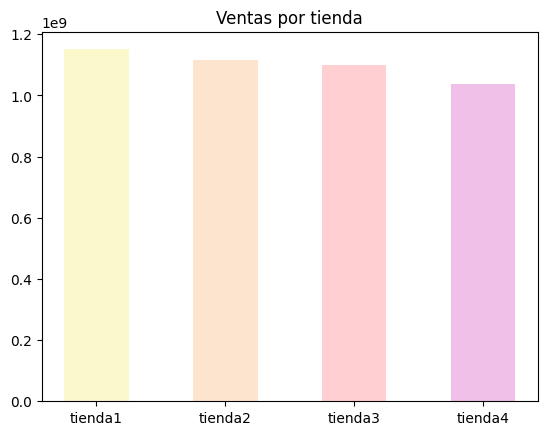

La tienda qué más vendió fue la tienda1 con 1150880400.0 ingresos totales
       Tienda        |     tienda1     |     tienda2     |     tienda3     |     tienda4    
  Ingresos Totales   |   1150880400.0  |   1116343500.0  |   1098019600.0  |   1038375700.0 


[('tienda1', 1150880400.0),
 ('tienda2', 1116343500.0),
 ('tienda3', 1098019600.0),
 ('tienda4', 1038375700.0)]

In [12]:
# aplicamos la función y verificamos la salida
ingresosTotalesPorTienda(tiendas)

In [13]:
# verificamos como quedó nuestra lista 'datos'
datos

[{'nombre': 'tienda1', 'ingresosTotales': 1150880400.0},
 {'nombre': 'tienda2', 'ingresosTotales': 1116343500.0},
 {'nombre': 'tienda3', 'ingresosTotales': 1098019600.0},
 {'nombre': 'tienda4', 'ingresosTotales': 1038375700.0}]

In [15]:
help(ingresosTotalesPorTienda)

Help on function ingresosTotalesPorTienda in module __main__:

ingresosTotalesPorTienda(listaTiendas)
    Función para calcular los ingresos totales por tienda y agregarlo a la lista "datos" modificandola con la llave "ingresosTotales" y su valor correspondiente.

    Args:
        La función recibirá una lista de tiendas.

    Outputs:
        Muestra un gráfico de barras y una tabla comparativa con los ingresos totales por tienda.

    Returns:
        Lista de tuplas con formato (tiendaN, ingresoTotal)



# 2. Ventas por categoría

En este paso calcularemos la cantidad de productos vendidos por categoría en cada tienda. 
La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [24]:
def ventasPorCategoria (listaTiendas):
    '''Función que lee una lista de las tiendas, agrega a la lista "datos" un diccionario a cada tienda con llave el nombre de la categoría y valor igual a la cantidad de productos vendidos de esa categoría.

    args:
        lista de tiendas

    return:
        lista de tuplas, cada elemento de la lista contiene tuplas con los datos de cada tienda según el formato (categoria, cantidad)

    '''
    
    # iniciaremos una lista llamada "categorias" para ir anexando dentro todas las categorías en caso de que esté presente en una tienda, y en otra no.

    categorias = []
    
    # accedemos a una lista de tuplas con el formato (número de venta, categoría del producto vendido)  con 
    # list(tiendas[i]["Categoría del Producto"].items())
    
    # iremos iterando sobre cada tienda de la lista

    # aplicamos sobre el objeto, map con una función lambda, que nos devuelva únicamente el segundo valor de la tupla que corresponde a la categoría del producto en dicha tienda

    for i in range(len(tiendas)):
        list(map(lambda x: categorias.append(x[1]) if x[1] not in categorias else None,list(tiendas[i]["Categoría del Producto"].items())))

    # ordenamos la lista de categorías alfabéticamente

    categorias.sort()

    # crearemos una lista de listas, con tuplas, donde cada lista de la lista, corresponde a una tienda, y dentro incluye tuplas con el formato (categoria, cantidad de elementos vendidos de la categoría).

    productosPorCategoriaPorTienda = []

    # iteramos sobre la lista de tiendas
    for i in range(len(tiendas)):

        # dentro de una tienda, obtendremos una lista con la categoría de cada producto vendido

        tienda = list(map(lambda x: x[1],list(tiendas[i]["Categoría del Producto"].items())))

        # creamos una nueva lista para almacenar las tuplas (categoria, cantProductos) dentro de nuestra lista productosPorCategoriaPorTienda al finalizar el conteo
        
        listaProvisoria = []

        # iteraremos sobre cada categoría obtenida previamente para contar la cantidad de veces que se repite con .count y agregarlo a nuestra listaProvisoria

        [listaProvisoria.append((categoria,tienda.count(categoria))) for categoria in categorias]

        # agregamos los datos de cantidad de productos vendidos por categoría dentro de nuestra lista datos, en un nuevo diccionario con compresión
        
        datos[i]['categorias'] = {categoria: tienda.count(categoria) for categoria in categorias}

        # finalmente agregamos nuestra listaProvisoria a nuestra lista de productosPorCategoriaPorTienda

        productosPorCategoriaPorTienda.append(listaProvisoria)
    
    # finalmente devolvemos la lista de tuplas obtenida
    return productosPorCategoriaPorTienda

    

In [27]:
# creamos una función que reciba como argumento la lista de tuplas obtenidas, para que nos muestre un gráfico y una salida de texto con las categorías más vendidas por tienda

def ventasPorCategoriaBarras(listaDeTiendas):
    '''
    
    '''

    # iteramos sobre cada lista de la lista, que corresponde a una tienda

    for i in range(len(listaDeTiendas)):

        # definiremos la paleta de colores en base a la cantidad de categorías dentro de las tiendas, reiniciandola para cada tienda

        colores = paleta_de_colores[:len(listaDeTiendas[0])]
        
        # de la tupla obtenemos únicamente las cantidades de productos vendidos por categoría y los asignamos a una lista

        valores = [categoria[1] for categoria in listaDeTiendas[i]]

        # luego creamos una nueva lista con los valores ordenados de mayor a menor dentro de una lista

        valoresOrdenados = sorted([categoria[1] for categoria in listaDeTiendas[i]], reverse=True)
        

        # para saber la categoría más vendida

        # creamos una variable para el más vendido, asignandole el valor del primer elemento de nuestra lista de valores ordenados que será el mayor

        cantCategoriaMasVendida1 = valoresOrdenados[0]

        # averiguamos el index del mayor elemento dentro de nuestra lista valores y lo almacenamos

        indexMasVendida1 = valores.index(cantCategoriaMasVendida1)

        # almacenamos el nombre de nuestra categoría más vendida en base al index obtenido previamente

        categoriaMasVendida1 = listaDeTiendas[i][indexMasVendida1][0]

        # cambiamos el color de su barra

        colores[indexMasVendida1] = '#2b9348'
        
        # para saber la segunda categoría más vendida, repetimos lo previo
        
        cantCategoriaMasVendida2 = valoresOrdenados[1]
        indexMasVendida2 = valores.index(cantCategoriaMasVendida2)
        categoriaMasVendida2 = listaDeTiendas[i][indexMasVendida2][0]

        # para cambiar su color de barra
        
        colores[indexMasVendida2] = '#55a630'

        # para saber la tercera categoría más vendida
        
        cantCategoriaMasVendida3 = valoresOrdenados[2]
        indexMasVendida3 = valores.index(cantCategoriaMasVendida3)
        categoriaMasVendida3 = listaDeTiendas[i][indexMasVendida3][0]

        # para cambiar su color de barra
        
        colores[indexMasVendida3] = '#80b918'

        # para saber la categoría menos vendida
        
        cantCategoriaMenosVendida = valoresOrdenados[-1]
        indexMenosVendida = valores.index(cantCategoriaMenosVendida)
        categoriaMenosVendida = listaDeTiendas[i][indexMenosVendida][0]

        # para cambiar su color de barra
        
        colores[indexMenosVendida] = '#f94144'
        
        # iniciamos el gráfico con su título, tamaño de fuente, espesor de la misma y color

        plt.title(f"Ventas por categoría en Tienda{i+1}", fontsize=16, fontweight="bold", color='black')

        # asignamos argumentos al eje x e y, como también el color de las barras
        plt.bar(x = [categoria[0] for categoria in listaDeTiendas[i]], height = valores, color = colores)

        # damos inclinación a las etiquetas del eje x debido a que son muchas y se superponen
        plt.xticks(rotation=90)

        # mostramos el gráfico
        plt.show()

        # mostramos conclusión
        print(f'La categoría más vendida de la tienda{i+1} es {categoriaMasVendida1} con {cantCategoriaMasVendida1} ventas')
        print(f'La segunda categoría más vendida de la tienda{i+1} es {categoriaMasVendida2} con {cantCategoriaMasVendida2} ventas')
        print(f'La tercera categoría más vendida de la tienda{i+1} es {categoriaMasVendida3} con {cantCategoriaMasVendida3} ventas')
        print(f'La categoría menos vendida de la tienda{i+1} es {categoriaMenosVendida} con {cantCategoriaMenosVendida} ventas')

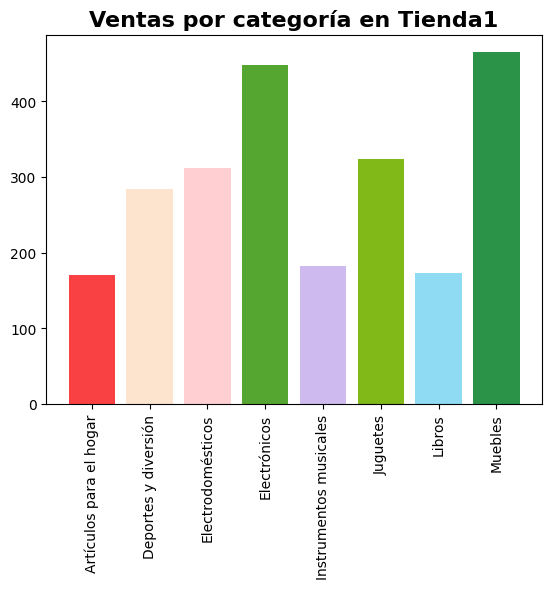

La categoría más vendida de la tienda1 es Muebles con 465 ventas
La segunda categoría más vendida de la tienda1 es Electrónicos con 448 ventas
La tercera categoría más vendida de la tienda1 es Juguetes con 324 ventas
La categoría menos vendida de la tienda1 es Artículos para el hogar con 171 ventas


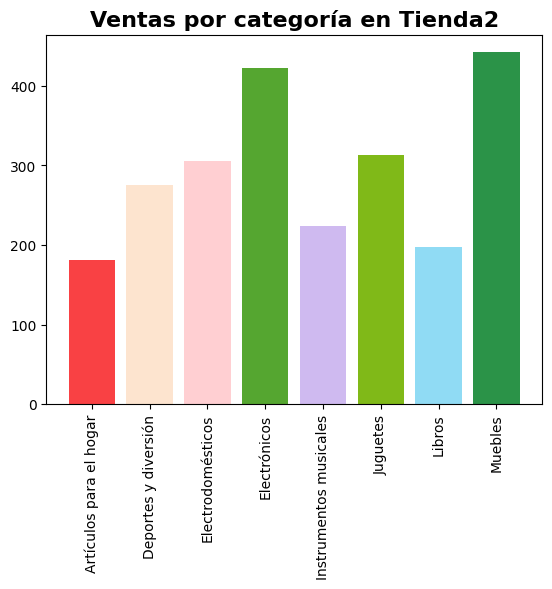

La categoría más vendida de la tienda2 es Muebles con 442 ventas
La segunda categoría más vendida de la tienda2 es Electrónicos con 422 ventas
La tercera categoría más vendida de la tienda2 es Juguetes con 313 ventas
La categoría menos vendida de la tienda2 es Artículos para el hogar con 181 ventas


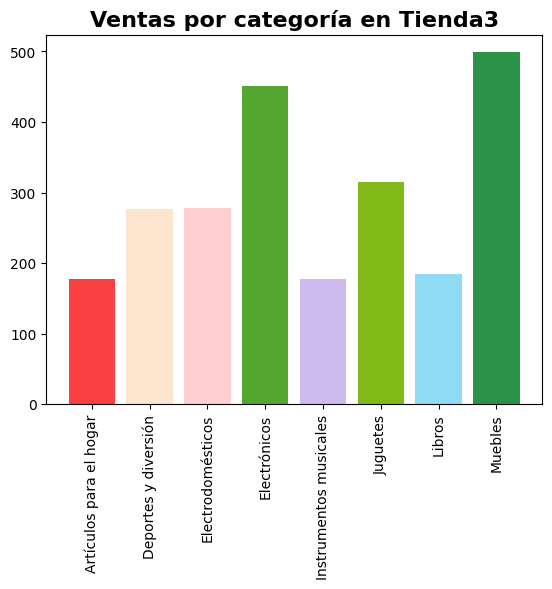

La categoría más vendida de la tienda3 es Muebles con 499 ventas
La segunda categoría más vendida de la tienda3 es Electrónicos con 451 ventas
La tercera categoría más vendida de la tienda3 es Juguetes con 315 ventas
La categoría menos vendida de la tienda3 es Artículos para el hogar con 177 ventas


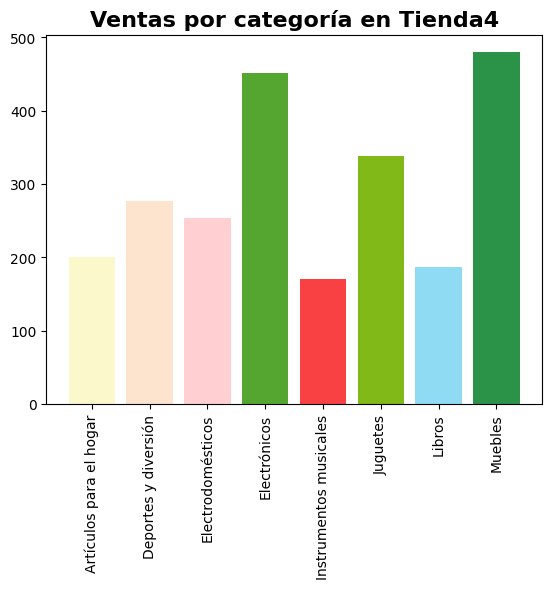

La categoría más vendida de la tienda4 es Muebles con 480 ventas
La segunda categoría más vendida de la tienda4 es Electrónicos con 451 ventas
La tercera categoría más vendida de la tienda4 es Juguetes con 338 ventas
La categoría menos vendida de la tienda4 es Instrumentos musicales con 170 ventas


In [28]:
# aplicamos la función para graficar, sobre la función ventasPorCategoria, entonces, agregamos la información a la lista datos, a la vez que obtenemos la tupla que retorna, como argumento de la función ventasPorCategoriaBarras

ventasPorCategoriaBarras(ventasPorCategoria(tiendas))

Creando una salida por tabla para ver mejor la cantidad de productos vendidos por categoría por tienda

In [33]:
# definimos una función para visualizar una tabla comparativa de la cantidad de productos vendidos por categoría en cada tienda
def ventasPorCategoriaPorTiendaComparativa (listaTiendas):
    
    # debemos recorrer desde -1 por el encabezado, hasta la cantidad de categorías
    
    for fila in range(-1,len(listaTiendas[0])):
        
        # debemos recorrer desde -1, ya que a partir de 0 iteraremos en la lista de tiendas
        for tienda in range(-1,len(listaTiendas)):
            if fila == -1:
                if tienda == -1:
                    print(f"{'Categoría':<25} | ", end="")
                elif tienda == len(listaTiendas)-1:
                    print(f"{('Tienda'+str(tienda+1)).center(10)}")
                else:
                    print(f"{('Tienda'+str(tienda+1)).center(10)} |", end="")
            else:
                if tienda == -1:
                    print(f"{(listaTiendas[0][fila][0]):<25} | ", end="")
                elif tienda == len(listaTiendas)-1:
                    print(f"{str(listaTiendas[tienda][fila][1]).center(10)}")           
                else:
                    print(f"{str(listaTiendas[tienda][fila][1]).center(10)} |", end="")  

In [34]:
ventasPorCategoriaPorTiendaComparativa(ventasPorCategoria(tiendas))

Categoría                 |  Tienda1   | Tienda2   | Tienda3   | Tienda4  
Artículos para el hogar   |    171     |   181     |   177     |   201    
Deportes y diversión      |    284     |   275     |   277     |   277    
Electrodomésticos         |    312     |   305     |   278     |   254    
Electrónicos              |    448     |   422     |   451     |   451    
Instrumentos musicales    |    182     |   224     |   177     |   170    
Juguetes                  |    324     |   313     |   315     |   338    
Libros                    |    173     |   197     |   185     |   187    
Muebles                   |    465     |   442     |   499     |   480    


# 3. Calificación promedio de la tienda


En este paso, calculamos las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [17]:
def calificacionMedia (tienda, ntienda):
    ''' Función definida para conocer la satisfacción del cliente con los productos vendidos.
    
    tienda: archivo original del que comenzamos a extraer los datos
    ntienda: número de la tienda que vamos a trabajar para anexar el valor calculado a nuestra lista de datos

    return = media : float
    '''

    # dentro de la tienda, entramos a 'Calificación' con tienda['Calificación'], lo convertimos en lista y aplicamos la función sum() para obtener la sumatoria de calificaciones
    # luego con la función len() la aplicamos a la lista de calificaciones para dividir la sumatoria entre la cantidad y obtenemos la media
    media = sum(list(tienda['Calificación']))/len(list(tienda['Calificación']))
    
    # añadimos a nuestra lista 'datos', dentro de la tienda correspondiente con ntienda, la llave 'Calificación Media' con el valor obtenido
    datos[ntienda-1]['Calificación Media'] = media

    # devolvemos el valor de la media
    return media


In [18]:
# lista de calificaciones medias de cada tienda para poder graficar
calificaciones_medias = [calificacionMedia(tienda1,1), calificacionMedia(tienda2,2), calificacionMedia(tienda3,3), calificacionMedia(tienda4,4)]

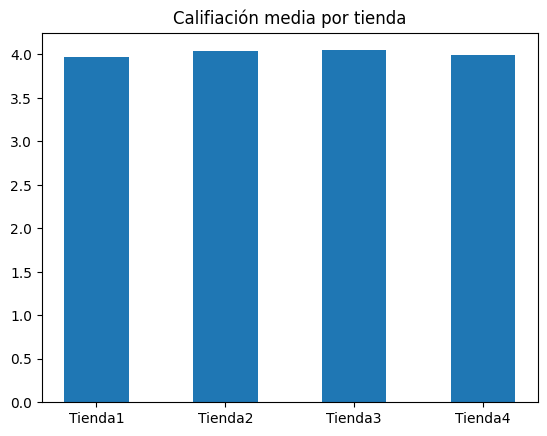

In [19]:
# mostramos la califiación media por tienda en un gráfico de barras
plt.title("Califiación media por tienda")
plt.bar(x = tiendas, height = calificaciones_medias, width=0.5)
plt.show()


In [20]:
# tabla para ver las calificaciones medias por tienda
# imprimimos el encabezado de la tabla
print(f"{'Tienda'.center(20)} | {'Tienda1'.center(10)} | {'Tienda2'.center(10)} | {'Tienda3'.center(10)} | {'Tienda4'.center(10)}")
# imprimimos los valores de las calificaciones medias de cada tienda
print(f"{'Calificación Media'.center(20)} | {str(round(datos[0]['Calificación Media'],2)).center(10)} | {str(round(datos[1]['Calificación Media'],2)).center(10)} | {str(round(datos[2]['Calificación Media'],2)).center(10)} | {str(round(datos[3]['Calificación Media'],2)).center(10)}")

       Tienda        |  Tienda1   |  Tienda2   |  Tienda3   |  Tienda4  
 Calificación Media  |    3.98    |    4.04    |    4.05    |    4.0    


# 4. Productos más y menos vendidos

En este paso, identificamos qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualizamos los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [21]:
# iniciamos un contador para ir iterando a su vez dentro de nuestra lista datos, en la tienda correspondiente con indexación d, para añadir los productos y cantidad vendida por tienda
d = 0

# iteraremos sobre los archivos originales de cada tienda
for tienda in (tienda1,tienda2,tienda3,tienda4):
  # añadimos a nuestra tienda en datos, la llave 'productos' inicializada como un diccionario vacío
  datos[d]['productos'] ={}

  # iteramos por tupla obtenida en la lista de items de productos, accediendo siempre al elemento de index 1, ya que el 0 corresponde a número de registro
  for producto in list(tienda['Producto'].items()):

    # si el producto ya se encuentra en nuestro registro, sumamos uno a su valor
    if producto[1] in datos[d]['productos']:
      datos[d]['productos'][producto[1]] += 1
    
    # sino inicializamos el producto en el registro con valor de 1
    else:
      datos[d]['productos'][producto[1]] = 1

  #para ordenar alfabéticamente los productos
  datos[d]['productos'] = dict(sorted(datos[d]['productos'].items()))

  # para continuar iterando sobre nuestras tiendas en datos, sumamos uno a la variable d
  d+=1

# para visualizar
datos

[{'nombre': 'Tienda1',
  'ingresos totales': 1150880400.0,
  'categorias': {'Artículos para el hogar': 171,
   'Deportes y diversión': 284,
   'Electrodomésticos': 312,
   'Electrónicos': 448,
   'Instrumentos musicales': 182,
   'Juguetes': 324,
   'Libros': 173,
   'Muebles': 465},
  'Calificación Media': 3.976685036032217,
  'productos': {'Ajedrez de madera': 49,
   'Armario': 60,
   'Asistente virtual': 40,
   'Auriculares': 50,
   'Auriculares con micrófono': 33,
   'Balón de baloncesto': 55,
   'Balón de voleibol': 42,
   'Batería': 53,
   'Bicicleta': 54,
   'Bloques de construcción': 56,
   'Cama box': 44,
   'Cama king': 44,
   'Carrito de control remoto': 52,
   'Celular ABXY': 33,
   'Ciencia de datos con Python': 39,
   'Cubertería': 52,
   'Cubo mágico 8x8': 44,
   'Cuerda para saltar': 40,
   'Dashboards con Power BI': 42,
   'Dinosaurio Rex': 40,
   'Estufa': 45,
   'Guitarra acústica': 46,
   'Guitarra eléctrica': 47,
   'Impresora': 54,
   'Iniciando en programación': 

Mostrando cantidad de productos vendidos por tienda en formato gráfico de barras

In [22]:
list(datos[0]['productos'].items())

[('Ajedrez de madera', 49),
 ('Armario', 60),
 ('Asistente virtual', 40),
 ('Auriculares', 50),
 ('Auriculares con micrófono', 33),
 ('Balón de baloncesto', 55),
 ('Balón de voleibol', 42),
 ('Batería', 53),
 ('Bicicleta', 54),
 ('Bloques de construcción', 56),
 ('Cama box', 44),
 ('Cama king', 44),
 ('Carrito de control remoto', 52),
 ('Celular ABXY', 33),
 ('Ciencia de datos con Python', 39),
 ('Cubertería', 52),
 ('Cubo mágico 8x8', 44),
 ('Cuerda para saltar', 40),
 ('Dashboards con Power BI', 42),
 ('Dinosaurio Rex', 40),
 ('Estufa', 45),
 ('Guitarra acústica', 46),
 ('Guitarra eléctrica', 47),
 ('Impresora', 54),
 ('Iniciando en programación', 41),
 ('Iphone 15', 49),
 ('Juego de mesa', 43),
 ('Kit de bancas', 44),
 ('Lavadora de ropa', 47),
 ('Lavavajillas', 48),
 ('Mesa de centro', 44),
 ('Mesa de comedor', 40),
 ('Mesa de noche', 56),
 ('Microondas', 60),
 ('Mochila', 39),
 ('Modelado predictivo', 51),
 ('Muñeca bebé', 40),
 ('Olla de presión', 35),
 ('Pandereta', 36),
 ('Refr

In [23]:
def mostrarDatosProductos(ntienda):
    # iniciamos la lista de tuplas de productos a iterar
    listaProductos = list(datos[ntienda-1]['productos'].items())

    # iniciamos las variables a definir
    maxvalor1 = 0
    maxproducto1 = ""
    imax1 = None
    maxvalor2 = 0
    maxproducto2 = ""
    imax2 = None
    maxvalor3 = 0
    maxproducto3 = ""
    imax3 = None
    minvalor = listaProductos[0][1]
    minproducto = listaProductos[0][0]
    imin = 0

    # iniciamos la lista de colores correspondiente a las barras
    colores = []

    
    # iteramos sobre los productos con una tupla de formato (producto, cantidad) en base a número de indexación, para atribuir y luego modificar si es necesario el color de la barra
    for indice in range(len(listaProductos)):
        # si la cantidad del producto es mayor a la cantidad de maxvalor1
        if listaProductos[indice][1] > maxvalor1:
            # el producto y su cantidad ubicados en max1, pasarán a max2
            maxvalor2 = maxvalor1
            maxproducto2 = maxproducto1
            imax2 = imax1
            # y el nuevo producto será el nuevo maxproducto1 y con el maxvalor1
            maxvalor1 = listaProductos[indice][1]
            maxproducto1 = listaProductos[indice][0]
            imax1 = indice
        elif maxvalor2 < listaProductos[indice][1] <= maxvalor1:
            # el producto y su cantidad ubicados en max2, pasarán a max3
            maxvalor3 = maxvalor2
            maxproducto3 = maxproducto2
            imax3 = imax2
            # y el nuevo producto será el nuevo maxproducto2 y con el maxvalor2
            maxvalor2 = listaProductos[indice][1]
            maxproducto2 = listaProductos[indice][0]
            imax2 = indice
        elif maxvalor3 < listaProductos[indice][1] <= maxvalor2:
            # el nuevo producto será el nuevo maxproducto3 y con el maxvalor3
            maxvalor3 = listaProductos[indice][1]
            maxproducto3 = listaProductos[indice][0]
            imax3 = indice
        if listaProductos[indice][1] < minvalor:
            minvalor = listaProductos[indice][1]
            minproducto = listaProductos[indice][0]
            imin = indice

        # agregamos el color base a la lista de colores
        colores.append('#f9c74f')
    
    # modificamos la lista de colores en base a los índices obtenidos
    colores[imax1] = '#277da1'
    colores[imax2] = '#4d908e'
    colores[imax3] = '#43aa8b'
    colores[imin] = '#f94144'
    
    plt.figure(figsize=(15, 5))
    plt.title(f"Cantidad de productos vendidos en la Tienda{ntienda}", fontsize=16, fontweight="bold", color='black')
    plt.bar(x = list(datos[ntienda-1]['productos']), height = list(map(lambda x: x[1], list(datos[ntienda-1]['productos'].items()))), color = colores)
    plt.xticks(rotation=90)
    plt.show()

    # resumiendo datos
    print(f'El producto más vendido en la tienda {ntienda} es el {maxproducto1} con {maxvalor1} unidades')
    print(f'El segundo producto más vendido en la tienda {ntienda} es el {maxproducto2} con {maxvalor2} unidades')
    print(f'El tercer producto más vendido en la tienda {ntienda} es el {maxproducto3} con {maxvalor3} unidades')
    print(f'El producto más vendido en la tienda {ntienda} es el {minproducto} con {minvalor} unidades')
    
    

In [24]:
list(map(lambda x: x[1], list(datos[2]['productos'].items())))

[47,
 49,
 39,
 43,
 39,
 50,
 48,
 41,
 52,
 35,
 46,
 56,
 52,
 44,
 46,
 39,
 44,
 53,
 40,
 46,
 53,
 47,
 38,
 50,
 46,
 46,
 52,
 57,
 42,
 52,
 42,
 56,
 55,
 36,
 36,
 53,
 39,
 47,
 51,
 50,
 45,
 55,
 36,
 46,
 47,
 54,
 46,
 45,
 42,
 48,
 38]

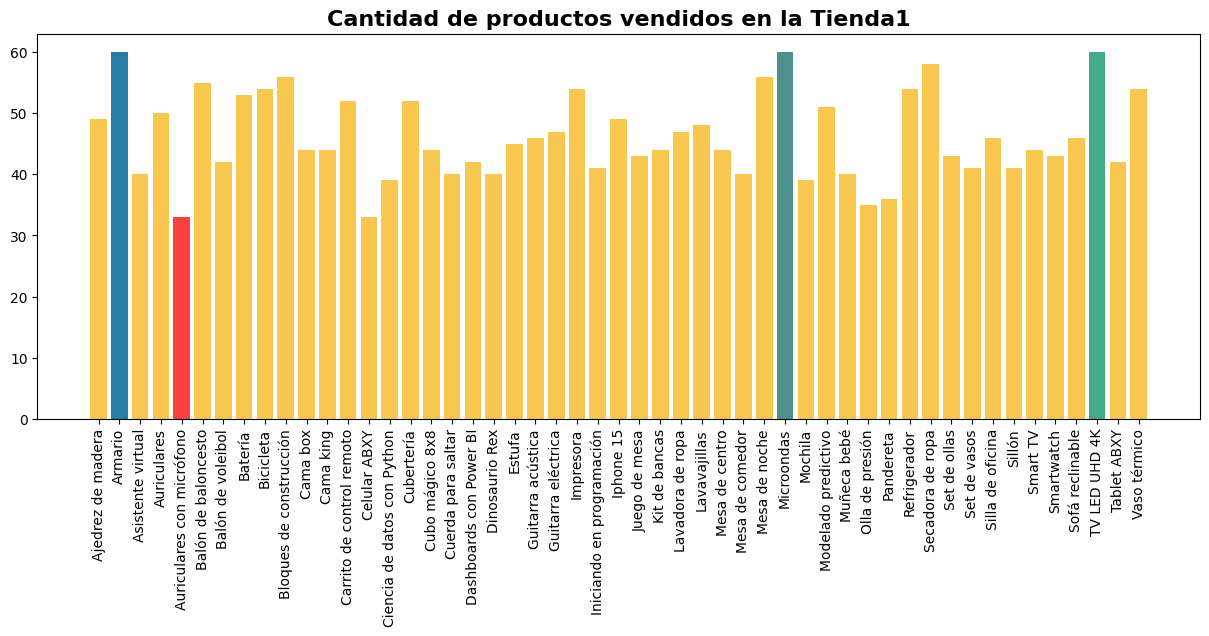

El producto más vendido en la tienda 1 es el Armario con 60 unidades
El segundo producto más vendido en la tienda 1 es el Microondas con 60 unidades
El tercer producto más vendido en la tienda 1 es el TV LED UHD 4K con 60 unidades
El producto más vendido en la tienda 1 es el Auriculares con micrófono con 33 unidades


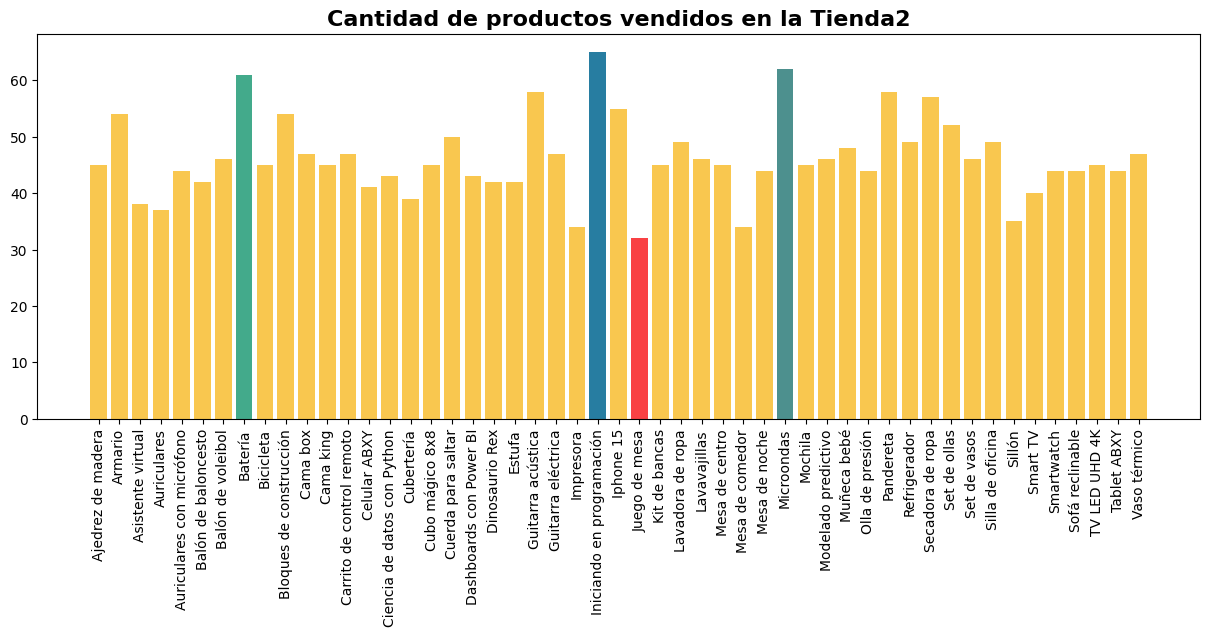

El producto más vendido en la tienda 2 es el Iniciando en programación con 65 unidades
El segundo producto más vendido en la tienda 2 es el Microondas con 62 unidades
El tercer producto más vendido en la tienda 2 es el Batería con 61 unidades
El producto más vendido en la tienda 2 es el Juego de mesa con 32 unidades


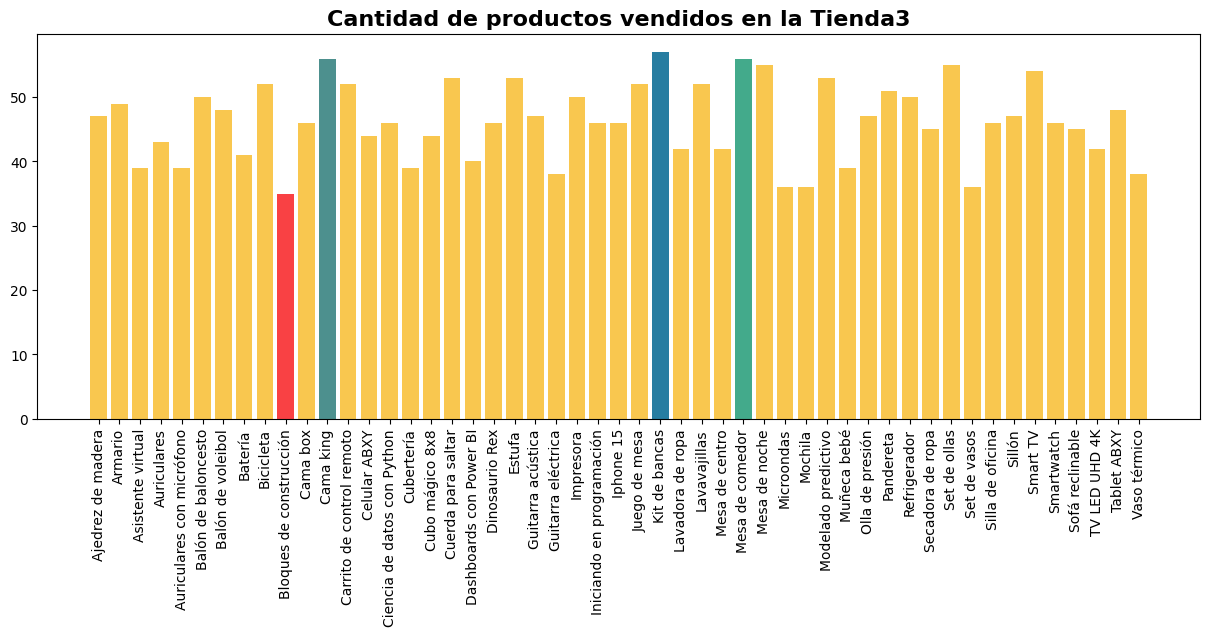

El producto más vendido en la tienda 3 es el Kit de bancas con 57 unidades
El segundo producto más vendido en la tienda 3 es el Cama king con 56 unidades
El tercer producto más vendido en la tienda 3 es el Mesa de comedor con 56 unidades
El producto más vendido en la tienda 3 es el Bloques de construcción con 35 unidades


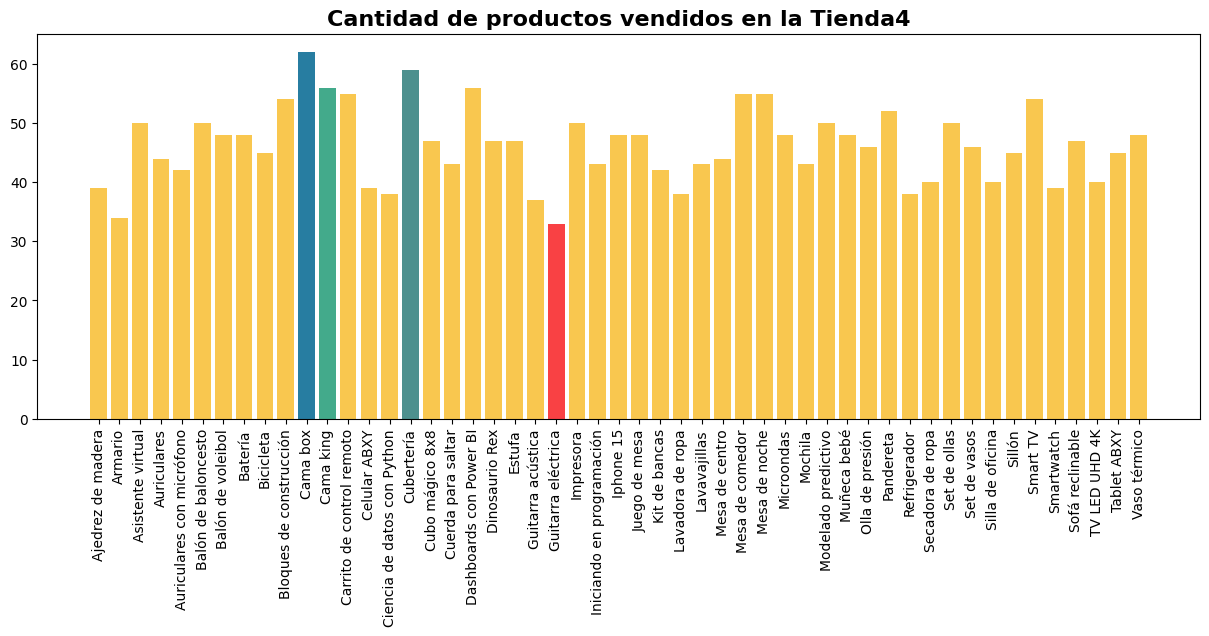

El producto más vendido en la tienda 4 es el Cama box con 62 unidades
El segundo producto más vendido en la tienda 4 es el Cubertería con 59 unidades
El tercer producto más vendido en la tienda 4 es el Cama king con 56 unidades
El producto más vendido en la tienda 4 es el Guitarra eléctrica con 33 unidades


In [25]:
mostrarDatosProductos(1)
mostrarDatosProductos(2)
mostrarDatosProductos(3)
mostrarDatosProductos(4)

# 5. Envío promedio por tienda

En este paso, calculamos el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [26]:
# inicializamos d como contador para iterar en nuestra lista datos a la vez que iteramos entre los archivos originales de nuestras tiendas
d = 0
for tienda in (tienda1, tienda2, tienda3, tienda4):
    # dentro de la tienda, ingresamos a 'Costo de envío', a través de .items() obtenemos la tupla de valores que luego convertimos a lista. Aplicamos .map con ayuda de la función lambda
    # para obtener una lista de únicamente los valores ubicados en la indexación 1, ya que la 0 sólo es un número de registo
    valores = list(map(lambda x: x[1], list(tienda['Costo de envío'].items())))

    # dentro de nuestros datos, correspondiente a la tienda que estamos trabajando, añadimos una llave 'Costo promedio de envío' cuyo valor será el promedio calculado a partir de la lista 'valores'
    datos[d]['Costo promedio de envío'] = sum(valores)/len(valores)

    # sumamos 1 a d para en la siguiente tienda de nuestra iteración, posicionarnos en la siguiente tienda de nuestra lista 'datos'
    d+=1

# pedimos salida sólo para verificar la adición
datos    

[{'nombre': 'Tienda1',
  'ingresos totales': 1150880400.0,
  'categorias': {'Artículos para el hogar': 171,
   'Deportes y diversión': 284,
   'Electrodomésticos': 312,
   'Electrónicos': 448,
   'Instrumentos musicales': 182,
   'Juguetes': 324,
   'Libros': 173,
   'Muebles': 465},
  'Calificación Media': 3.976685036032217,
  'productos': {'Ajedrez de madera': 49,
   'Armario': 60,
   'Asistente virtual': 40,
   'Auriculares': 50,
   'Auriculares con micrófono': 33,
   'Balón de baloncesto': 55,
   'Balón de voleibol': 42,
   'Batería': 53,
   'Bicicleta': 54,
   'Bloques de construcción': 56,
   'Cama box': 44,
   'Cama king': 44,
   'Carrito de control remoto': 52,
   'Celular ABXY': 33,
   'Ciencia de datos con Python': 39,
   'Cubertería': 52,
   'Cubo mágico 8x8': 44,
   'Cuerda para saltar': 40,
   'Dashboards con Power BI': 42,
   'Dinosaurio Rex': 40,
   'Estufa': 45,
   'Guitarra acústica': 46,
   'Guitarra eléctrica': 47,
   'Impresora': 54,
   'Iniciando en programación': 

In [27]:
# tabla para ver el promedio del costo de envío por tienda
# imprimimos el encabezado de la tabla
print(f"{'Tienda'.center(25)} | {'Tienda1'.center(10)} | {'Tienda2'.center(10)} | {'Tienda3'.center(10)} | {'Tienda4'.center(10)}")
# imprimimos los valores de los promedios en los costos de envío de cada tienda
print(f"{'Costo Promedio de Envío'.center(25)} | {str(round(datos[0]['Costo promedio de envío'],2)).center(10)} | {str(round(datos[1]['Costo promedio de envío'],2)).center(10)} | {str(round(datos[2]['Costo promedio de envío'],2)).center(10)} | {str(round(datos[3]['Costo promedio de envío'],2)).center(10)}")

          Tienda          |  Tienda1   |  Tienda2   |  Tienda3   |  Tienda4  
 Costo Promedio de Envío  |  26018.61  |  25216.24  |  24805.68  |  23459.46 


In [28]:
!pip install numpy

import numpy as np


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Conclusión

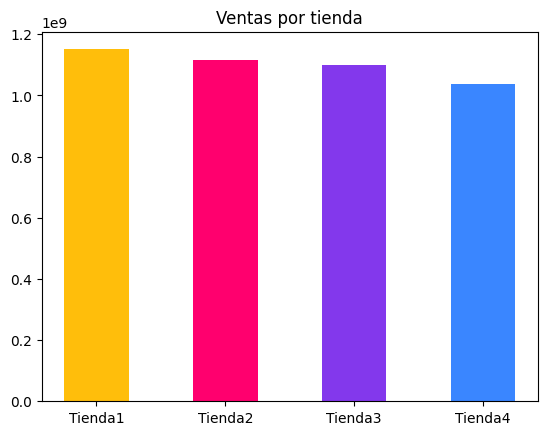

          Tienda          |     Tienda1     |     Tienda2     |     Tienda3     |     Tienda4    
 Costo Promedio de Envío  |   1150880400.0  |   1116343500.0  |   1098019600.0  |   1038375700.0 

La tienda con más ingresos fue la Tienda1 con un monto de 1150880400.0


In [37]:
# mostramos la venta por tienda en un gráfico de barras
plt.title("Ventas por tienda")
plt.bar(x = tiendas, height = ingresos_totales, width=0.5, color =  ['#ffbe0b', "#ff006e", '#8338ec', '#3a86ff'])
plt.show()

# tabla para ver los ingresos por tienda
# imprimimos el encabezado de la tabla
print(f"{'Tienda'.center(25)} | {'Tienda1'.center(15)} | {'Tienda2'.center(15)} | {'Tienda3'.center(15)} | {'Tienda4'.center(15)}")
# imprimimos los valores de lingresos totales de cada tienda
print(f"{'Costo Promedio de Envío'.center(25)} | {str(round(datos[0]['ingresos totales'],2)).center(15)} | {str(round(datos[1]['ingresos totales'],2)).center(15)} | {str(round(datos[2]['ingresos totales'],2)).center(15)} | {str(round(datos[3]['ingresos totales'],2)).center(15)}")

print(f'\nLa tienda con más ingresos fue la Tienda{ingresos_totales.index(max(ingresos_totales))+1} con un monto de {max(ingresos_totales)}')

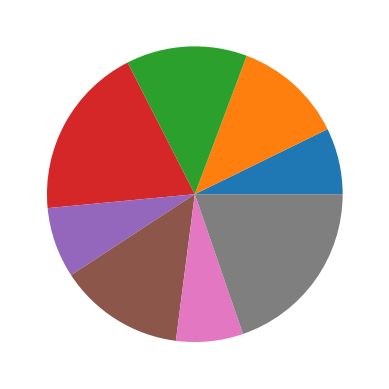

In [ ]:
# gráfico de categorias por tienda

def mostrarDatosCategorias

In [52]:
listaCategoriasValores = list(map(lambda x: x[1], datos[0]['categorias'].items() ))
listaCategoriasValores


[171, 284, 312, 448, 182, 324, 173, 465]

In [53]:
listaCategoriasNombres = list(map(lambda x: x[0], datos[0]['categorias'].items() ))
listaCategoriasNombres

['Artículos para el hogar',
 'Deportes y diversión',
 'Electrodomésticos',
 'Electrónicos',
 'Instrumentos musicales',
 'Juguetes',
 'Libros',
 'Muebles']

In [67]:
coloresPosibles = ["#fbf8cc","#fde4cf","#ffcfd2","#f1c0e8","#cfbaf0","#a3c4f3","#90dbf4","#8eecf5","#98f5e1","#b9fbc0"]

In [68]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} u)"


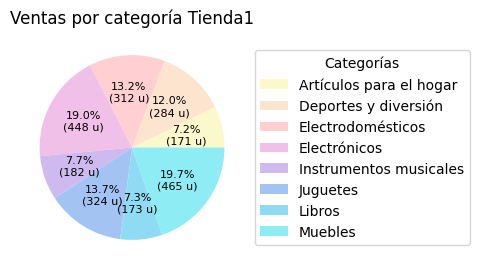

In [69]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(listaCategoriasValores, colors=coloresPosibles, autopct=lambda pct: func(pct, listaCategoriasValores))

ax.legend(wedges, listaCategoriasNombres,
          title="Categorías",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8)

ax.set_title("Ventas por categoría Tienda1")

plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} u)"

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

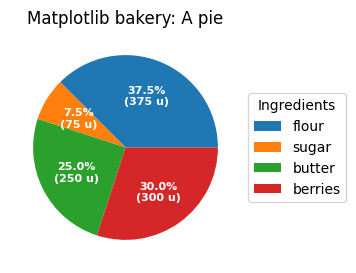

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} u)"

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

In [ ]:
tienda1.head(len(tienda1))

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111
